In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

Dataset                          

In [38]:
"generation paradigm:y = Xw + b + ϵ(w =(2,-3.4)T、b = 4.2)."
def synthetic_data(w, b, num_examples): #@save
    """⽣成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))#生成正态分布数据集
    y = torch.matmul(X, w) + b#高维矩阵乘法
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [18]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [22]:
print(features.shape,labels.shape)
print('features:', features[0],'\nlabel:', labels[0])

torch.Size([1000, 2]) torch.Size([1000, 1])
1000
features: tensor([0.0227, 0.6551]) 
label: tensor([2.0056])


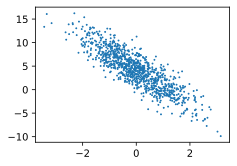

In [21]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [36]:
def data_iter(batch_size, features, labels):#随机抽取batch_size大小的数据出来
    num_examples = len(features)
    indices = list(range(num_examples))#生成一个序列表
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [35]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

0
tensor([996, 606, 580, 590, 330, 485, 588, 812, 856, 845])
tensor([[-0.6572,  0.4553],
        [ 0.9180, -0.7476],
        [-1.5452, -0.3308],
        [ 1.2070, -0.7510],
        [-0.2236, -0.3722],
        [ 1.4433, -1.4314],
        [-0.5678,  1.7272],
        [ 1.5070, -0.1322],
        [-0.0890,  1.0134],
        [-1.1200,  0.8271]]) 
 tensor([[ 1.3219],
        [ 8.5959],
        [ 2.2253],
        [ 9.1629],
        [ 5.0226],
        [11.9466],
        [-2.8052],
        [ 7.6570],
        [ 0.5931],
        [-0.8639]])


In [41]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)#初始化权重+自动微分
b = torch.zeros(1, requires_grad=True)

Model

In [43]:
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [45]:
def squared_loss(y_hat, y): #@save #损失函数，均方差
    """均⽅损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [67]:
def SGD(params, lr, batch_size): #@save #自定义优化函数
    """⼩批量随机梯度下降"""
    with torch.no_grad():#关闭自动求梯度
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

Train

In [68]:
lr = 0.03 #设置超参数
num_epochs = 3
net = linreg
loss = squared_loss

In [69]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的⼩批量损失
        # 因为l形状是(batch_size,1)，⽽不是⼀个标量。l中的所有元素被加到⼀起，并以此计算关于[w,b]的梯度
        l.sum().backward()
        SGD([w, b], lr, batch_size) # 使⽤参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048


In [70]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0009, 0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)
